<a href="https://colab.research.google.com/github/ValentinoFilipetto/Thesis/blob/main/Direct_product_of_graphs_G_and_H.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Example: two graphs and drawings. We work on directed labelled  multigraphs. 


[(1, 2, {'label': 'R'}), (1, 2, {'label': 'S'}), (1, 2, {'label': 'Z'}), (2, 3, {'label': 'R'}), (3, 1, {'label': 'S'}), (3, 1, {'label': 'T'}), (3, 1, {'label': 'W'}), (3, 2, {'label': 'G'})]


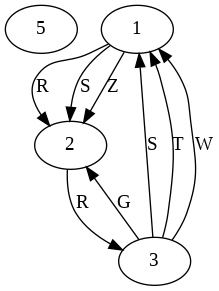

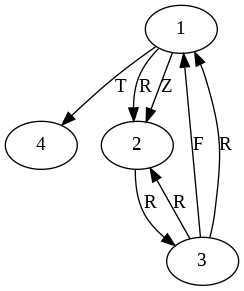

In [134]:
import networkx as nx
import matplotlib.pyplot as plt
from IPython.display import Image, display

G1=nx.MultiDiGraph ()

G1.add_node(5)

G1.add_edge(1,2,label='R')
G1.add_edge(1,2,label='S')
G1.add_edge(1,2,label='Z')
G1.add_edge(3,1,label='S')
G1.add_edge(3,2,label='G')
G1.add_edge(2,3,label='R')
G1.add_edge(3,1,label='T')
G1.add_edge(3,1,label='W')

#new_edge = [(5,1,label='S')]

#G1.add_edges_from(new_edge)

#node_label = nx.get_node_attributes(G1,'id')
pos = nx.spring_layout(G1)
#node_label = nx.get_node_attributes(G1,'id')
pos = nx.spring_layout(G1)
p=nx.drawing.nx_pydot.to_pydot(G1)
p.write_png('G1.png')
Image(filename='G1.png')

print(G1.edges(data=True))

#####################################################################

G2=nx.MultiDiGraph ()

G2.add_node(4)

G2.add_edge(1,2,label='R')
G2.add_edge(1,4,label='T')
G2.add_edge(1,2,label='Z')
G2.add_edge(3,1,label='F')
G2.add_edge(3,2,label='R')
G2.add_edge(2,3,label='R')
G2.add_edge(3,1,label='R')

#for edge in G2.edges(data=True): edge[2]['label'] = edge[2]['weight']
node_label = nx.get_node_attributes(G2,'id')
pos = nx.spring_layout(G2)
node_label = nx.get_node_attributes(G2,'id')
pos = nx.spring_layout(G2)
g=nx.drawing.nx_pydot.to_pydot(G2)
g.write_png('G2.png')
Image(filename='G2.png')

listOfImageNames = ['G1.png',
                    'G2.png']

for imageName in listOfImageNames:
    display(Image(filename=imageName))






Cartesian product of the sets of nodes of two graphs G and H.


In [72]:
from itertools import product # Importing the cartesian product of two sets

#print(list(product(G_1,G_2))) # Example

# These two functions give us the set of nodes of the new graph

def _dict_product(d1, d2):
    return {k: (d1.get(k), d2.get(k)) for k in set(d1) | set(d2)}

def _node_product(G,H):
    for u, v in product(G, H):
      yield ((u, v), _dict_product(G.nodes[u], H.nodes[v]))


Example to check that everything works:



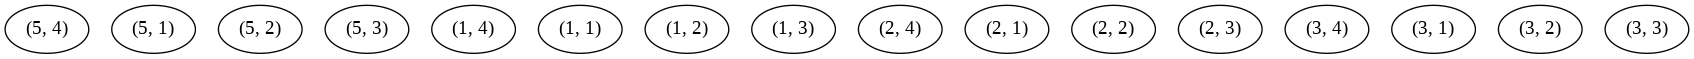

In [74]:
GH = nx.MultiDiGraph ()

GH.add_nodes_from(_node_product(G1,G2))
m=nx.drawing.nx_pydot.to_pydot(GH)
m.write_png('GH.png')
Image(filename='GH.png')

listOfImageNames = ['GH.png']

for imageName in listOfImageNames:
    display(Image(filename=imageName))

New edges of the direct product of two graphs G and H.

In [138]:
def edge_product(G,H,GH):
  for (uG,vG,lG) in G.edges(data=True):
    for (uH,vH,lH) in H.edges(data=True):
     if list(lG.values()) == list(lH.values()):
       GH.add_edge((uG,uH),(vG,vH),label=list(lG.values())[0])
       



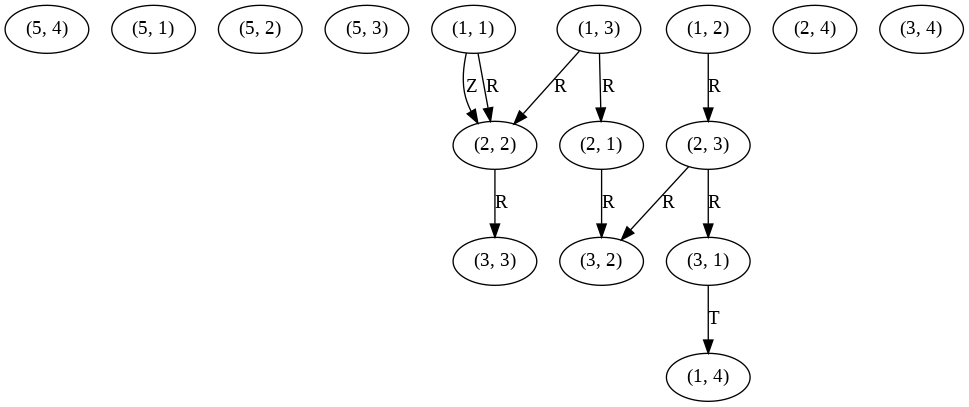

In [139]:
G3 = nx.MultiDiGraph ()

G3.add_nodes_from(_node_product(G1,G2))

edge_product(G1,G2,G3)

node_label = nx.get_node_attributes(G3,'id')
pos = nx.spring_layout(G3)
p=nx.drawing.nx_pydot.to_pydot(G3)
p.write_png('G3.png')
Image(filename='G3.png')

listOfImageNames = ['G3.png']

for imageName in listOfImageNames:
    display(Image(filename=imageName))

